In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
input_folder = 'traditional_output'
dfs = []
for filename in os.listdir(input_folder):
    print(f"Processing file: {filename}")
    if filename.endswith('.csv'):
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)
        
        # Display the value counts of the 'emotion' column
        print(f"Value counts for {filename}:")
        print(len(df['attack'].value_counts()))
        print(df['attack'].value_counts())
    else:
        continue

Processing file: ctv_video_comments.csv_processed.csv
Value counts for ctv_video_comments.csv_processed.csv:
2
attack
Not Malicious    76
Malicious        24
Name: count, dtype: int64
Processing file: ttv_video_comments.csv_processed.csv
Value counts for ttv_video_comments.csv_processed.csv:
2
attack
Not Malicious    63
Malicious        15
Name: count, dtype: int64
Processing file: settv_video_comments.csv_processed.csv
Value counts for settv_video_comments.csv_processed.csv:
2
attack
Not Malicious    78
Malicious        22
Name: count, dtype: int64
Processing file: tvbs_video_comments.csv_processed.csv
Value counts for tvbs_video_comments.csv_processed.csv:
2
attack
Not Malicious    22
Malicious        10
Name: count, dtype: int64


Processing file: pts_video_comments.csv_processed.csv
Processing file: sparklo_video_comments.csv_processed.csv
Processing file: 77_video_comments.csv_processed.csv
Processing file: ctv_video_comments.csv_processed.csv
Processing file: ttv_video_comments.csv_processed.csv
Processing file: settv_video_comments.csv_processed.csv
Processing file: tvbs_video_comments.csv_processed.csv


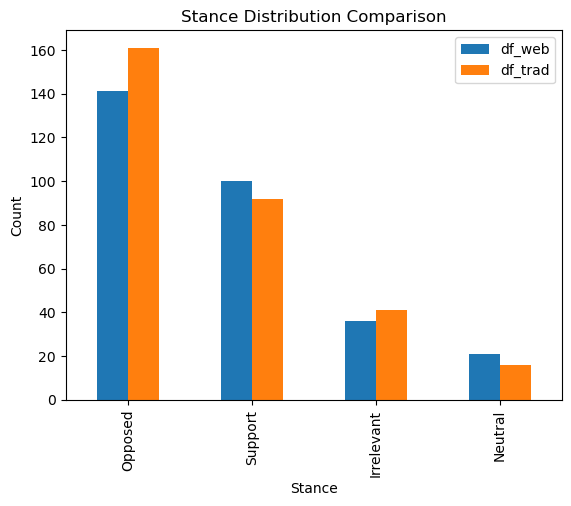

In [ ]:
web_media_folder = 'web_media_output/'
trad_folder = 'traditional_output/'

dfs_web = []
dfs_trad = []

for filename in os.listdir(web_media_folder):
    print(f"Processing file: {filename}")
    if filename.endswith('.csv'):
        file_path = os.path.join(web_media_folder, filename)
        df = pd.read_csv(file_path)
        dfs_web.append(df)
    else:
        continue

for filename in os.listdir(trad_folder):
    print(f"Processing file: {filename}")
    if filename.endswith('.csv'):
        file_path = os.path.join(trad_folder, filename)
        df = pd.read_csv(file_path)
        dfs_trad.append(df)
    else:
        continue

# Concatenate all dataframes
df_web = pd.concat(dfs_web, ignore_index=True)
df_trad = pd.concat(dfs_trad, ignore_index=True)


# 假設 feature 是「stance」
vc1 = df_web['stance'].value_counts()
vc2 = df_trad['stance'].value_counts()

# 對齊 index，補齊沒出現的類別
df_compare = pd.concat([vc1, vc2], axis=1).fillna(0)
df_compare.columns = ['df_web', 'df_trad']

# 畫群組式長條圖
df_compare.plot(kind='bar')
plt.title('Stance Distribution Comparison')
plt.ylabel('Count')
plt.xlabel('Stance')
plt.legend()
plt.show()

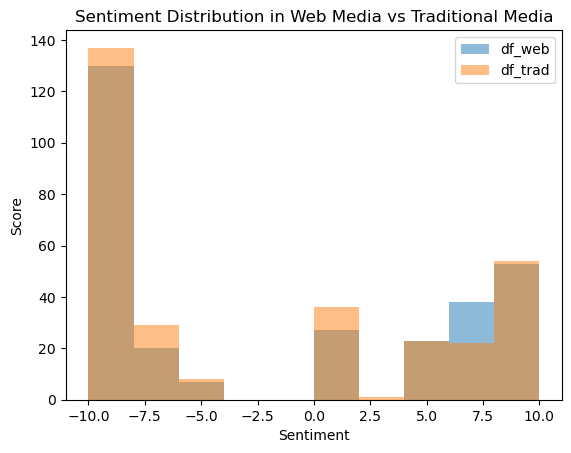

In [ ]:
plt.hist(df_web['sentiment'], alpha=0.5, label='df_web')
plt.hist(df_trad['sentiment'], alpha=0.5, label='df_trad')
plt.legend()
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Sentiment Distribution in Web Media vs Traditional Media')
plt.show()

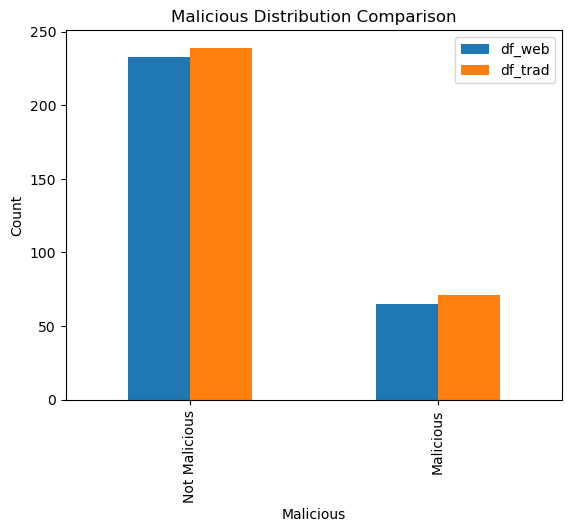

In [76]:
vc1 = df_web['attack'].value_counts()
vc2 = df_trad['attack'].value_counts()

# 對齊 index，補齊沒出現的類別
df_compare = pd.concat([vc1, vc2], axis=1).fillna(0)
df_compare.columns = ['df_web', 'df_trad']

# 畫群組式長條圖
df_compare.plot(kind='bar')
plt.title('Malicious Distribution Comparison')
plt.ylabel('Count')
plt.xlabel('Malicious')
plt.legend()
plt.show()